# Aufgabe 4

Drücken Sie den Winkel $\phi$ zwischen den beiden Regressionsgeraden (der Regression y auf x und von x auf y) durch $s_x$ , $s_y$ und $s_{xy}$ aus. Beachten Sie etwa das Additionstheorem der Tangensfunktion.

Für zwei Stichproben 

$x = (1,2,5,6,4,9,12,10)$, und 

$y = (2,3,5,4,7,12,9,30)$ 

errechnet sich die Ausgleichsgerade bzgl. $y$ mit $y = \bar{y} + \frac{s_{xy}}{s_x^2}(x-\bar{x})$ und 

und die Ausgleichsgerade bzgl. $x$ mit $x = \bar{x} + \frac{s_{xy}}{s_y^2}(y-\bar{y})$

Praktisches Beispiel im Folgenden.

In [1]:
### define basic statistical operations ###
def calc_mean(sample):
    n = len(sample)
    sum_of_items = 0.0
    for item in sample:
        sum_of_items = sum_of_items + item
    return sum_of_items / n

def calc_variance(sample):
    n = len(sample)
    mean = calc_mean(sample)
    temp = 0
    for item in sample:
        temp = temp + ((item - mean)**2)
    return temp / (n)

def calc_sample_covariance(x,y):
    if len(x) != len(y):
        print("len(x) != len(y)")
        return 0
    n = len(x)
    mean_x = calc_mean(x)
    mean_y = calc_mean(y)
    temp = 0
    for i in range(n):
        temp = temp + ((y[i] - mean_y)*(x[i] - mean_x))
    return temp / (n-1)

In [2]:
### define x and y regression
def calc_regression_x(x,y):
    sample_cov = calc_sample_covariance(x,y)
    variance = calc_variance(y)
    mean_y = calc_mean(y)
    mean_x = calc_mean(x)
    regression = []
    for item in y:
        temp =  mean_x + (sample_cov/variance* (item - mean_y))
        regression.append(temp)
    return regression

def calc_regression_y(x,y):
    sample_cov = calc_sample_covariance(x,y)
    variance = calc_variance(x)
    mean_y = calc_mean(y)
    mean_x = calc_mean(x)
    regression = []
    for item in x:
        temp =  mean_y + (sample_cov/variance* (item - mean_x))
        regression.append(temp)
    return regression

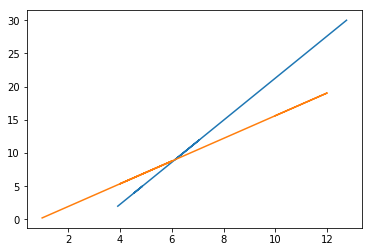

In [5]:
# run regression on sample data and plot
import numpy as np
from matplotlib import pyplot as plt
x = np.array([1, 2, 5, 6, 4, 9, 12, 10])
y = np.array([2, 3, 5, 4, 7,12,9, 30])

x_regression = calc_regression_x(x,y)
y_regression  = calc_regression_y(x,y)

plt.plot(x_regression, y)
plt.plot(x, y_regression)
plt.show()

Lt. Aufgabenstellung soll nun der Schnittwinkel beider Regressionsgeraden ausgedrückt werden. Dieser errechnet sich aus den Steigungswinkeln der einzelnen geraden mit $tan(\alpha) = a$.

Dabei sind die Regressionskoeffienten der Ausgleichsgerade bzgl. $y$ / $x$ definiert als

$a_x = \frac{s_{xy}}{s_x^2}$ für $y = \bar{y} + \frac{s_{xy}}{s_x^2}(x-\bar{x})$ und 

$a_y = \frac{s_{xy}}{s_y^2}$ für  $x = \bar{x} + \frac{s_{xy}}{s_y^2}(y-\bar{y})$

Der Schnittwinkel is nun die Subtraktion der Steigungswinkel gegeben mit $tan(\alpha) = tan(\alpha_1) - tan(\alpha_2)$. Der Schnittwinkel $\alpha$ ist somit $\alpha = arctan(\alpha_1) - arctan(\alpha_2)$.

Hilfe des Additionstheorems für Arkusfunktionen gilt:

\begin{equation}
arctan(x) - arctan(y) = arctan(\frac{x-y}{1+xy})
\end{equation}

Der Winkel $\phi$ der Ausgleichsgeraden bzgl. $y$ / $x$ ist somit: 

\begin{equation}
\phi = arctan(\frac{s_{xy}}{s_x^2}) - arctan(\frac{s_{xy}}{s_y^2}) = 
arctan(\frac{\frac{s_{xy}}{s_x^2}-\frac{s_{xy}}{s_y^2}}{1+ \frac{s_{xy}}{s_x^2} \frac{s_{xy}}{s_y^2} })
\end{equation}

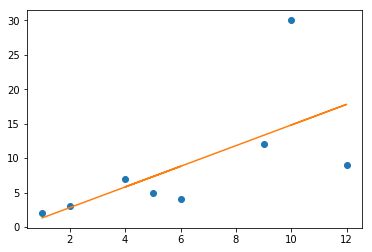

In [4]:

###### BACKUP ####

import numpy as np
from matplotlib import pyplot as plt

x = np.array([1, 2, 5, 6, 4, 9, 12, 10])
y = np.array([2, 3, 5, 4, 7,12,9, 30])
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)